In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler as sc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("vgsales.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          999 non-null    int64  
 1   Name          999 non-null    object 
 2   Platform      999 non-null    object 
 3   Year          999 non-null    int64  
 4   Genre         999 non-null    object 
 5   Publisher     998 non-null    object 
 6   NA_Sales      999 non-null    float64
 7   EU_Sales      999 non-null    float64
 8   JP_Sales      999 non-null    float64
 9   Other_Sales   999 non-null    float64
 10  Global_Sales  999 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 86.0+ KB


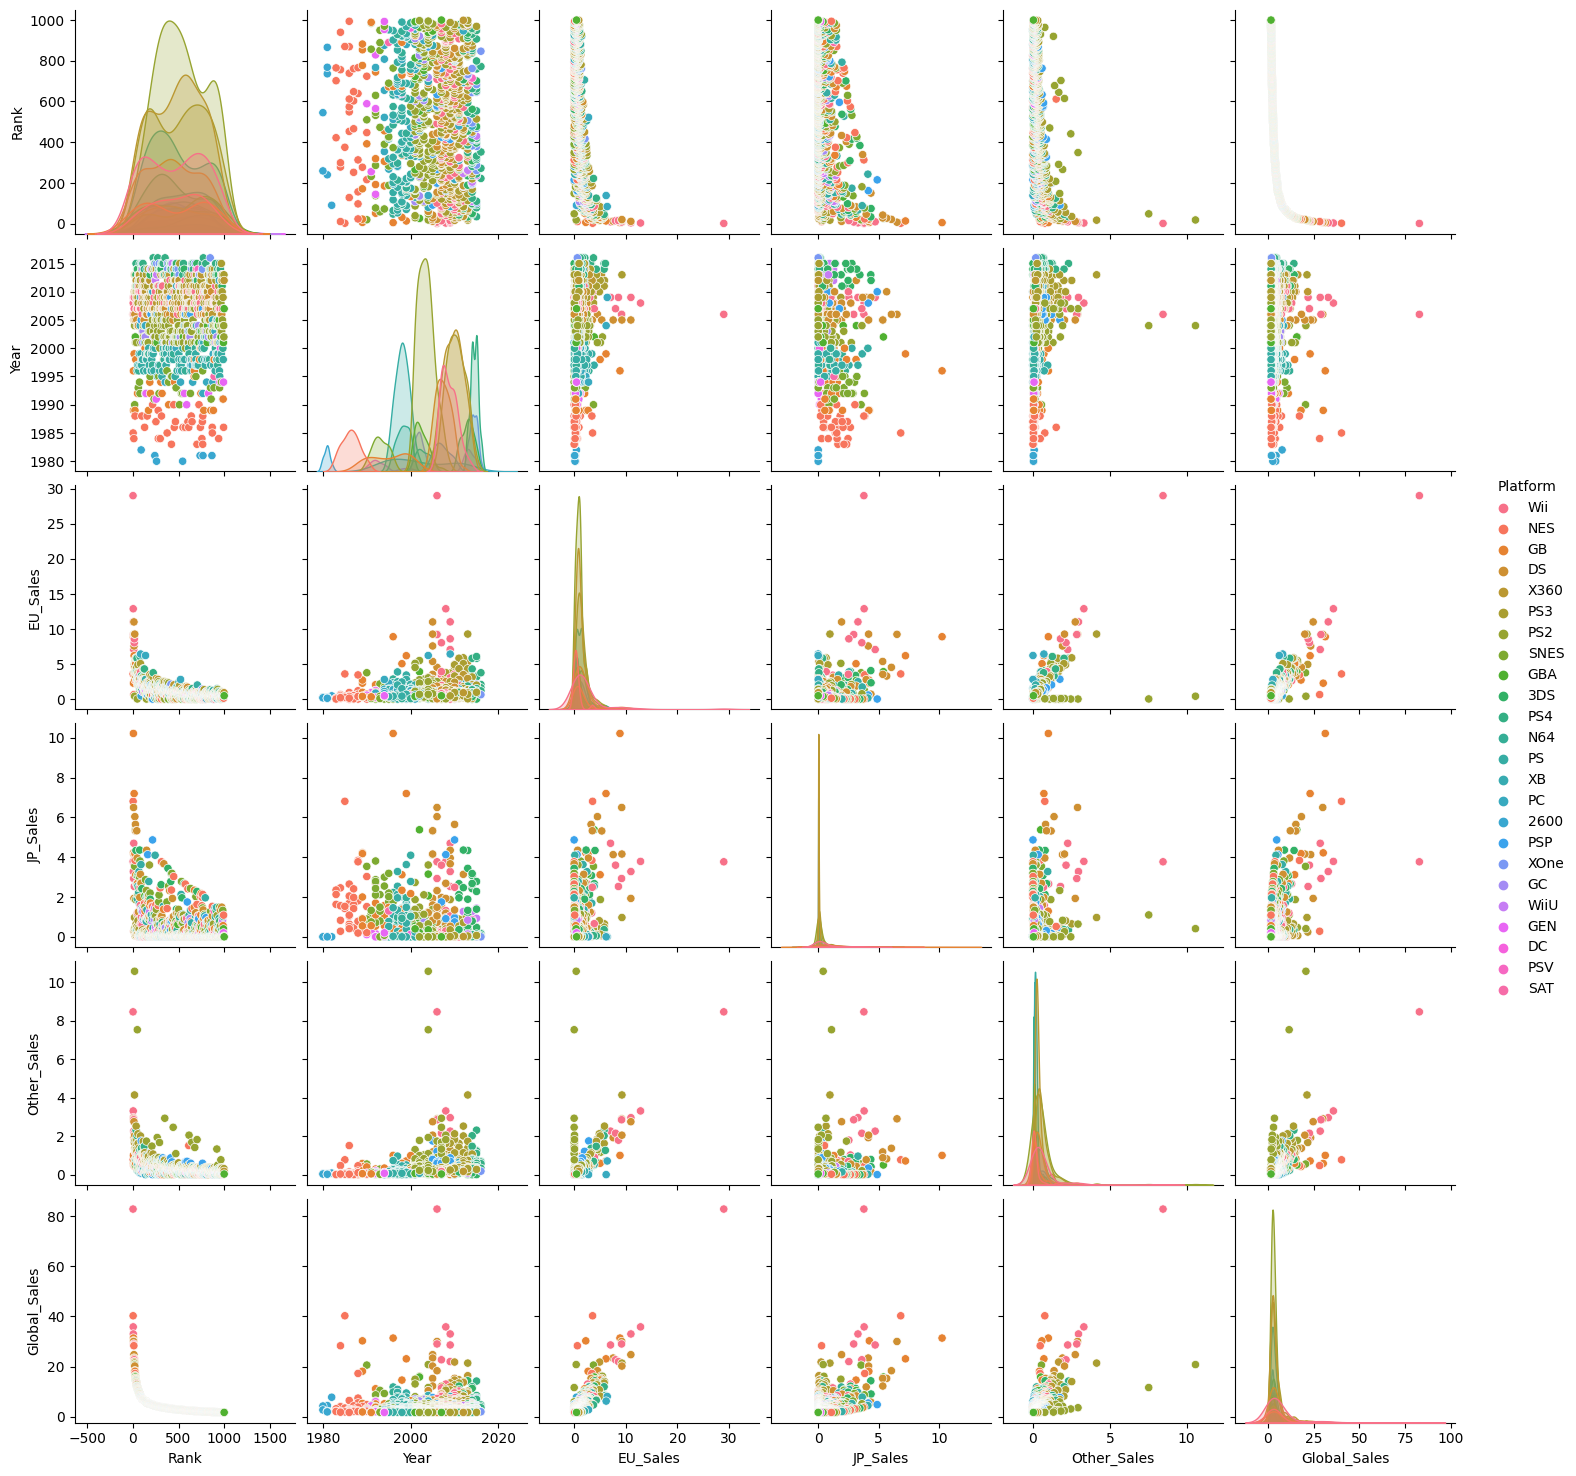

In [ ]:
sns.pairplot(data=df, hue="Platform")

---

In [8]:
x = df.loc[:,["Year", "Global_Sales", "NA_Sales"]]
normalizer = sc()
x_norm = normalizer.fit_transform(x)

In [9]:
df_norm = pd.DataFrame(x_norm, columns = ["Year", "Global_Sales", "NA_Sales"])
df_norm

,Year,Global_Sales,NA_Sales
0,0.161560,16.295988,15.049644
1,-2.745275,7.467504,10.310472
2,0.438402,6.549341,5.258155
3,0.576822,5.963545,5.219967
4,-1.222647,5.624947,3.509129
...,...,...,...
994,-0.392123,-0.525910,-0.324979
995,-0.392123,-0.525910,-0.466276
996,1.130505,-0.525910,-0.519740
997,0.992084,-0.525910,-0.535015


In [10]:
df_norm.describe()

,Year,Global_Sales,NA_Sales
count,9.990000e+02,9.990000e+02,9.990000e+02
mean,9.463234e-15,-5.690032e-17,2.845016e-17
std,1.000501e+00,1.000501e+00,1.000501e+00
min,-3.437378e+00,-5.259101e-01,-7.946958e-01
25%,-5.305434e-01,-4.386639e-01,-4.223595e-01
50%,1.615601e-01,-2.911762e-01,-2.218708e-01
75%,7.152429e-01,2.041733e-02,6.072289e-02
max,1.545767e+00,1.629599e+01,1.504964e+01


In [11]:
def startKmeans(k):
  wcss = []
  score = []
  for k in range(2,k) :
    model_k = KMeans(n_clusters = k)
    clusters = model_k.fit_predict(df_norm)
    wcss.append(model_k.inertia_)
    score.append(silhouette_score(x_norm, clusters))
  return wcss, score

In [12]:
kmax = 10
wcss, score = startKmeans(kmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

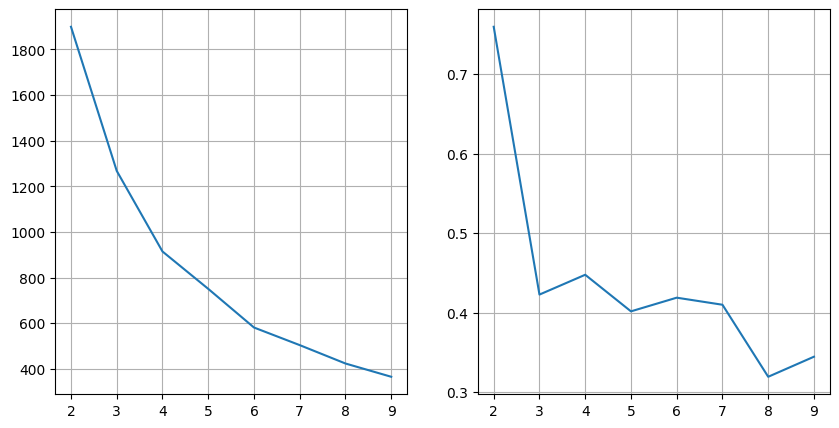

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(2,kmax), wcss)
plt.grid(True)

plt.subplot(122)
plt.plot(range(2,kmax), score)
plt.grid(True)

In [14]:
model_final = KMeans(n_clusters=6)
clusters_final = model_final.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df["Cluster"] = pd.Series(clusters_final)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,3
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,4
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Tom Clancy's Ghost Recon,XB,2002,Shooter,Ubisoft,1.23,0.46,0.00,0.07,1.76,0
995,997,State of Emergency,PS2,2002,Action,Take-Two Interactive,0.86,0.67,0.00,0.22,1.76,0
996,998,BioShock Infinite,PS3,2013,Shooter,Take-Two Interactive,0.72,0.69,0.04,0.31,1.76,1
997,999,Hitman: Absolution,X360,2012,Action,Square Enix,0.68,0.90,0.01,0.17,1.76,1


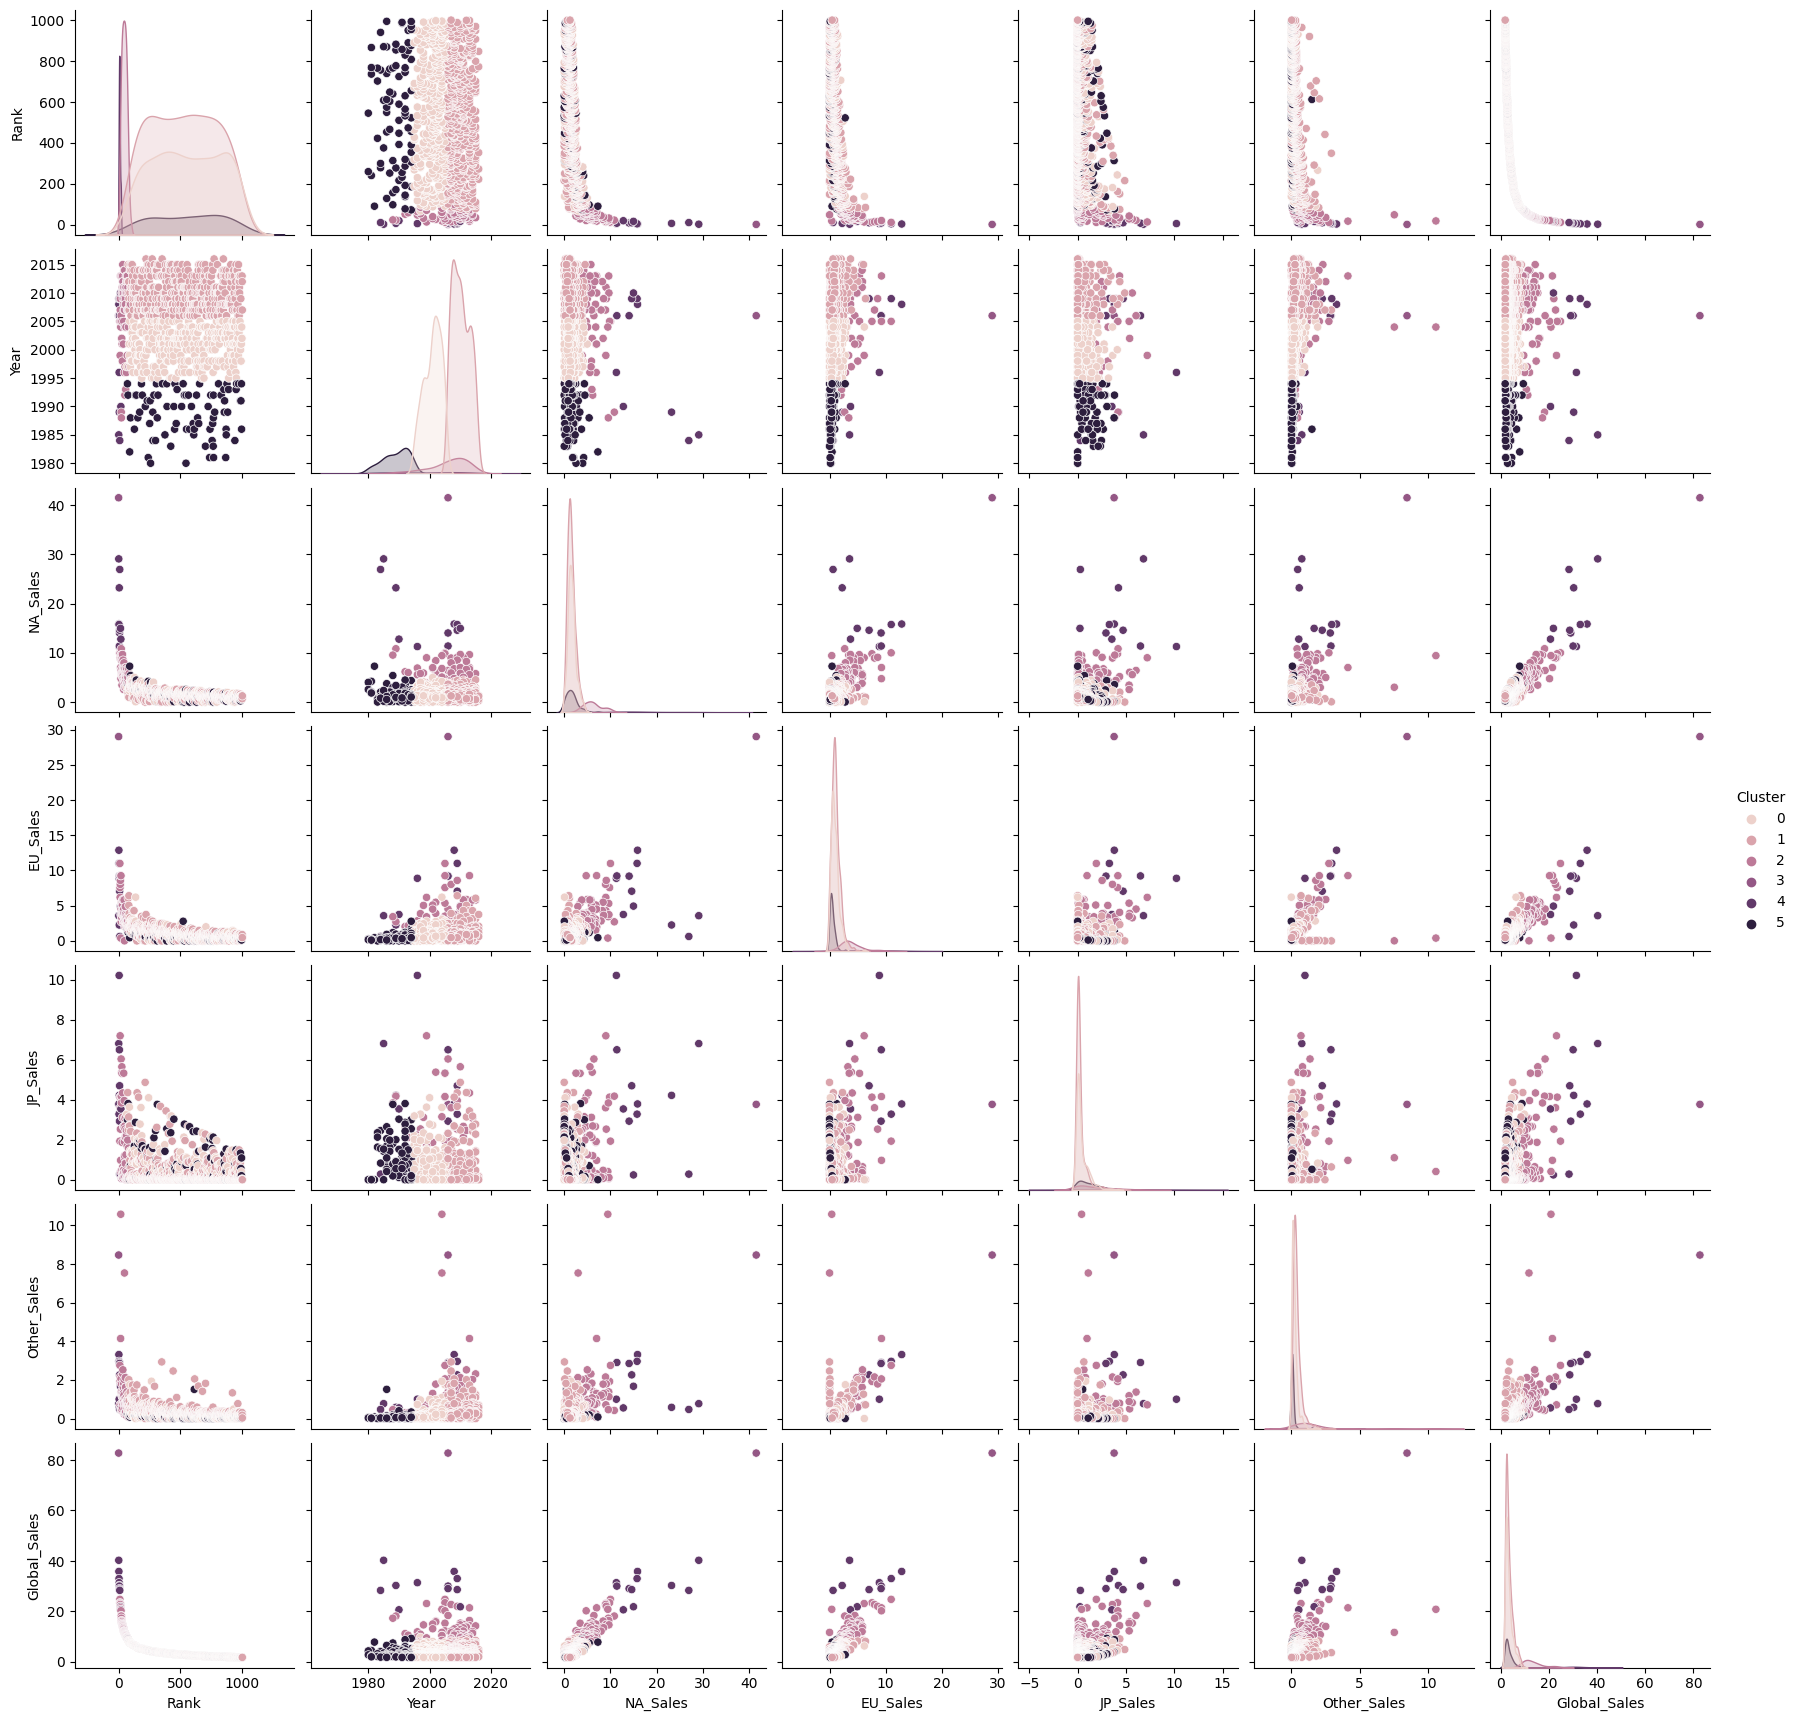

In [16]:
 sns.pairplot(data=df, hue="Cluster")